## Contents
### Importing Data
### Importing Dataset
### Exploring Relationship
### Correlation Matrix
### Scatterplots
### Pair Plots
### Categorical Plots
### Revisit Questions
### Hypothesis

## Importing Libs

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.__version__

'3.5.2'

In [3]:
# This option ensures the charts we create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

## Importing Dataset

In [5]:
path = r'C:\Users\shyou\OneDrive\Documents\Data Analitics Course\Achievement6\Global SuperStore Project'

In [6]:
df = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data','GlobalSuperstore_clean.csv'))

In [7]:
df.head()

,Unnamed: 0,id,order_id,order_date,ship_mode,customer_id,segment,city,state,country,...,product_id,category,Sub_category,sales,quantity,discount,profit,shipping_cost,year,month
0,0,1,MX-2014-143658,2014-02-10,Standard Class,SC-20575,Consumer,Mexico City,Distrito Federal,Mexico,...,OFF-LA-10002782,Office Supplies,Labels,13.08,3,0.0,4.56,1.03,2014,2
1,1,2,MX-2012-155047,2012-10-15,Standard Class,KW-16570,Consumer,Dos Quebradas,Risaralda,Colombia,...,FUR-FU-10004015,Furniture,Furnishings,252.16,8,0.0,90.72,13.45,2012,10
2,2,3,MX-2012-155047,2012-10-15,Standard Class,KW-16570,Consumer,Dos Quebradas,Risaralda,Colombia,...,FUR-BO-10002352,Furniture,Bookcases,193.28,2,0.0,54.08,9.63,2012,10
3,3,4,MX-2012-155047,2012-10-15,Standard Class,KW-16570,Consumer,Dos Quebradas,Risaralda,Colombia,...,OFF-BI-10004428,Office Supplies,Binders,35.44,4,0.0,4.96,1.37,2012,10
4,4,5,MX-2012-155047,2012-10-15,Standard Class,KW-16570,Consumer,Dos Quebradas,Risaralda,Colombia,...,OFF-AR-10004594,Office Supplies,Art,71.60,2,0.0,11.44,3.79,2012,10


In [9]:
df.drop(['Unnamed: 0'] , axis = 1, inplace = True)

In [34]:
df.describe()

,id,sales,quantity,discount,profit,shipping_cost,year,month
count,51290.00000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,246.490581,3.476545,0.142908,28.610982,26.375915,2012.777208,7.143420
std,14806.29199,487.565361,2.278766,0.212280,174.340972,57.296804,1.098931,3.394749
min,1.00000,0.444000,1.000000,0.000000,-6599.978000,0.000000,2011.000000,1.000000
25%,12823.25000,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000,4.000000
50%,25645.50000,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000,7.000000
75%,38467.75000,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000,10.000000
max,51290.00000,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000,12.000000


## Create Subset

In [15]:
sub = df[['sales' , 'quantity','profit','discount' ,'shipping_cost']]

## Exploring Relationships

### Correlations:

In [16]:
# Create a correlation matrix using pandas
sub.corr()

,sales,quantity,profit,discount,shipping_cost
sales,1.000000,0.313577,0.484918,-0.086722,0.768073
quantity,0.313577,1.000000,0.104365,-0.019875,0.272649
profit,0.484918,0.104365,1.000000,-0.316490,0.354441
discount,-0.086722,-0.019875,-0.316490,1.000000,-0.079056
shipping_cost,0.768073,0.272649,0.354441,-0.079056,1.000000


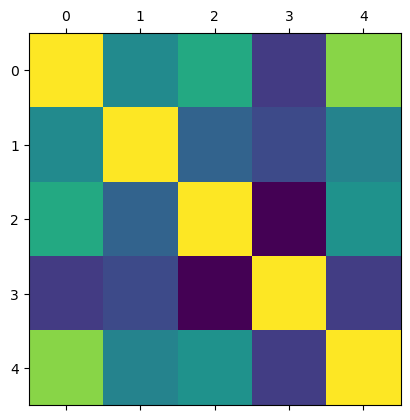

In [17]:
# Create a correlation heatmap using matplotlib
plt.matshow(sub.corr())
plt.show()

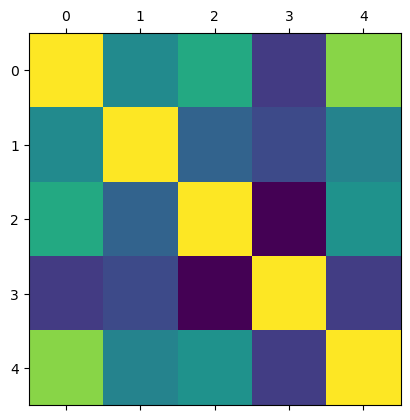

In [18]:
# Save figure
plt.matshow(sub.corr())
plt.savefig("matplotlib_correlation_heatmap.png") 

In [19]:
#current dir
cwd = os.getcwd()
cwd

'C:\\Users\\shyou\\OneDrive\\Documents\\Data Analitics Course\\Achievement6\\Global SuperStore Project\\03 Scripts'

Text(0.5, 1.0, 'Correlation Matrix')

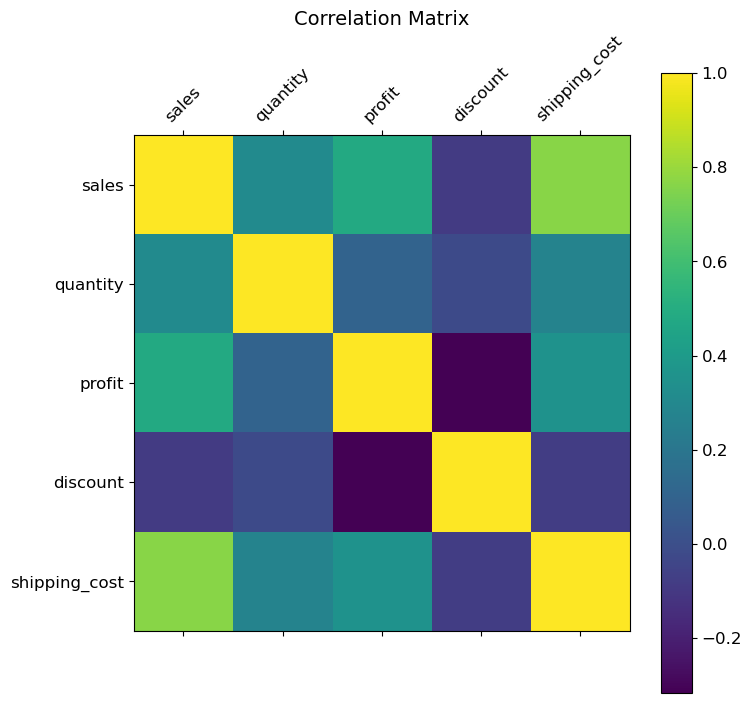

In [21]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(sub.shape[1]), sub.columns, fontsize=12, rotation=45) # x axis labels
plt.yticks(range(sub.shape[1]), sub.columns, fontsize=12) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=12) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

Text(0.5, 1.0, 'Correlation Matrix')

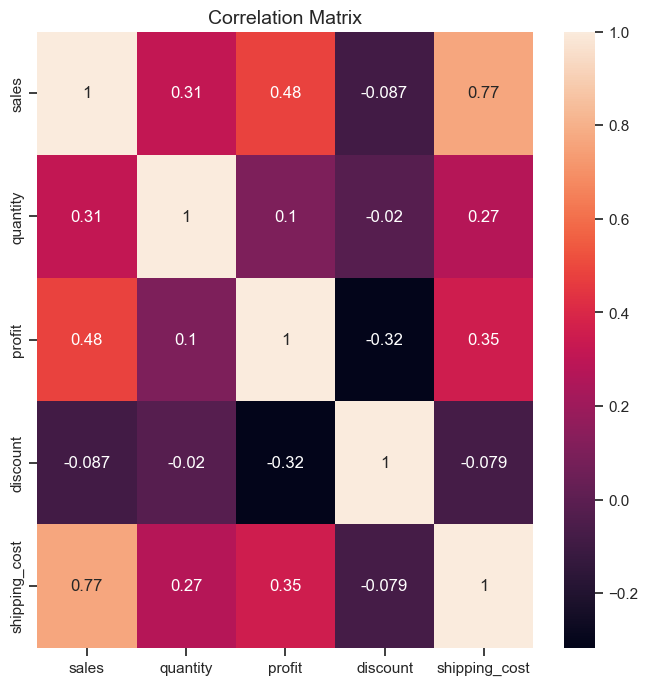

In [85]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(8,8))
# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)
plt.title('Correlation Matrix', fontsize=14)
# The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

In [86]:
f.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'seaborn_correlation_heatmap.png'))

## Discussing relationships between the variables

##### 1- There is a positive and strong correlation between Sales and shipping_cost (0.77), which means Increased sales will lead to increased shipping costs.
#### 2- There is a negative and weak correlation between Sales and Discount(-0.08), which means Increased sales will lead to a littel decreased Discount.
#### 3- There is a positive and almost moderate correlation between Sales and Profit(0.48), which means Increased sales will lead to a little increased Profit.
#### 4- There is a positive and weak correlation between Sales and Quantity(0.31), which means Increased sales will lead to very little increased Profit.
#### In general, negative coefficients  indicate a negative correlation and positive coefficients  indicate a positive correlation between two variables, and the absolute value of the coefficients  indicates the slope of the correlation line. This slope is between 0 and 1, coefficients  close to one indicate a stronger relationship and a coefficients  close to zero indicates a weak correlation. Zero coefficients  indicate that there is no correlation between the two variables.

### Scatterplots

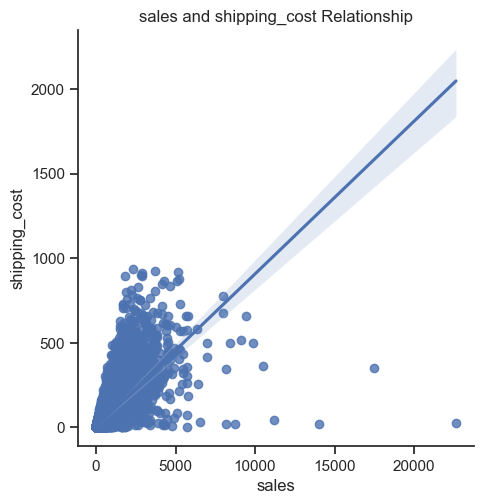

In [90]:
# Create a scatterplot for the "sales" and "shipping_cost" columns in seaborn

f2 = sns.lmplot(x = 'sales', y = 'shipping_cost', data = df).set(
    title="sales and shipping_cost Relationship")


In [91]:
f2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplots_sales and shipping_cost.png'))

## Discussing relationships between sales and shipping_cost in scatterplots

#### In my opinion, there is not a simple linear trend between sales and shipping_cost, it seems a non-linear trend, and we need to use a POLYNOMIAL TREND LINE. The outlier value, and the large number of points that don’t fall close to the trend line all show us that the correlation coefficient alone isn’t enough to produce an accurate view of the relationship between these two variables. 

### Pair Plots

In [28]:
df.columns

Index(['id', 'order_id', 'order_date', 'ship_mode', 'customer_id', 'segment',
       'city', 'state', 'country', 'market', 'product_id', 'category',
       'Sub_category', 'sales', 'quantity', 'discount', 'profit',
       'shipping_cost', 'year', 'month'],
      dtype='object')

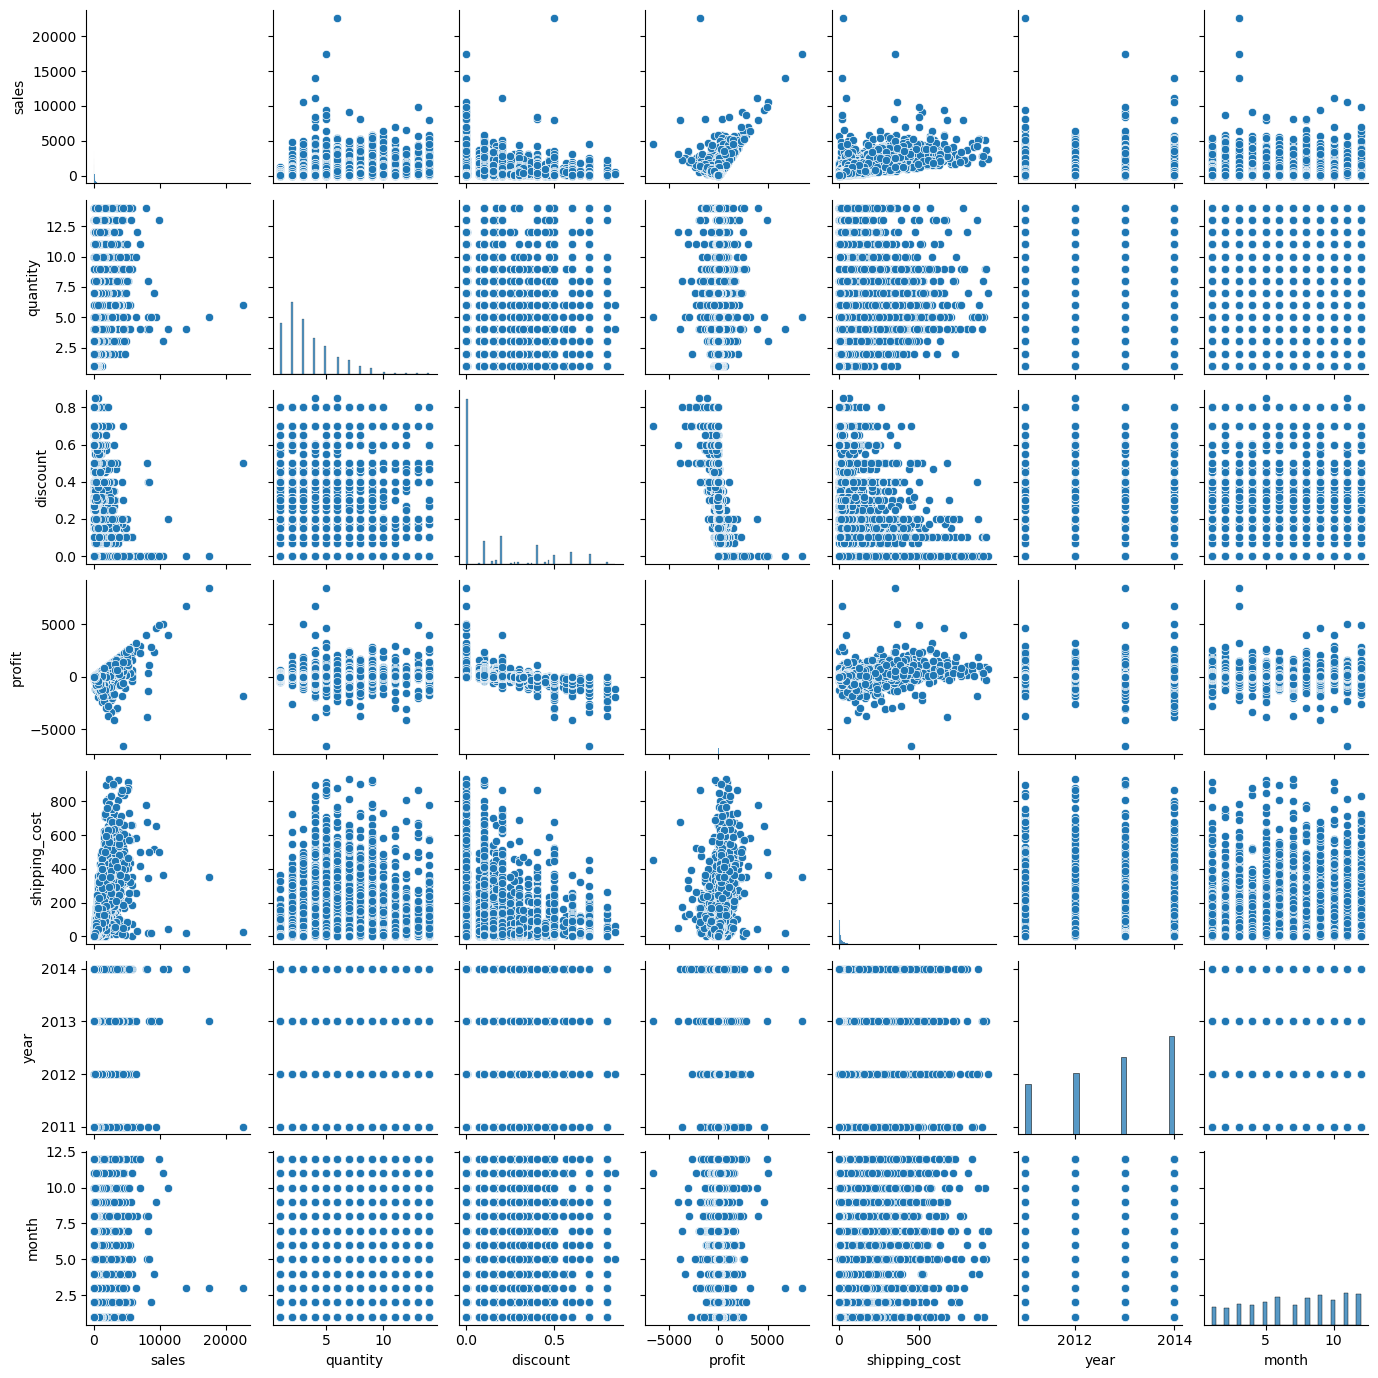

In [31]:
sub2 = df[['ship_mode', 'segment',
       'city', 'state', 'country', 'market', 'category',
       'Sub_category', 'sales', 'quantity', 'discount', 'profit',
       'shipping_cost', 'year', 'month']]
p = sns.pairplot(sub2, height=2)

#### All variables have a non-normal distribution and almost all of them are skewed to the right( except year and month).This indicates high outliers. which affects even the type of relationship between variables.
#### I would like to examine the impact of important variables such as sales and profits

## Create categorical plot

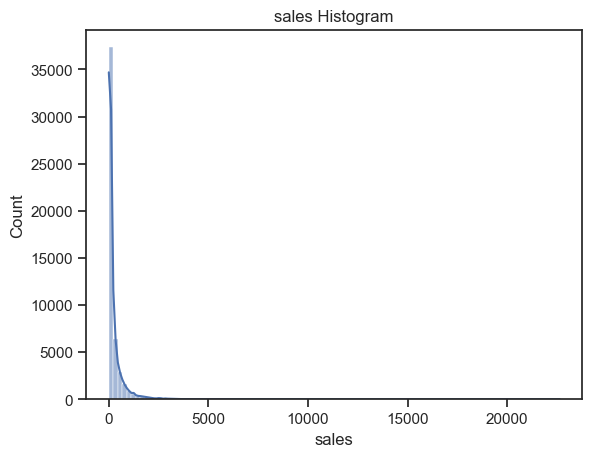

In [95]:
f3 = sns.histplot(df['sales'], bins = 100 , kde = True ).set(title="sales Histogram")


In [64]:
df.loc[df['sales'] < 500, 'sales_category'] = 'Low'
df.loc[(df['sales'] >= 500) & (df['sales'] < 5000), 'sales_category'] = 'Middle'
df.loc[df['sales'] >= 5000,'sales_category'] = 'High'


In [65]:
df['sales_category'].value_counts(dropna = False)

Low       44538
Middle     6708
High         44
Name: sales_category, dtype: int64

In [66]:
sub3 = df[['sales','quantity','sales_category' ]]

In [67]:
sub3.head()

,sales,quantity,sales_category
0,13.08,3,Low
1,252.16,8,Low
2,193.28,2,Low
3,35.44,4,Low
4,71.60,2,Low


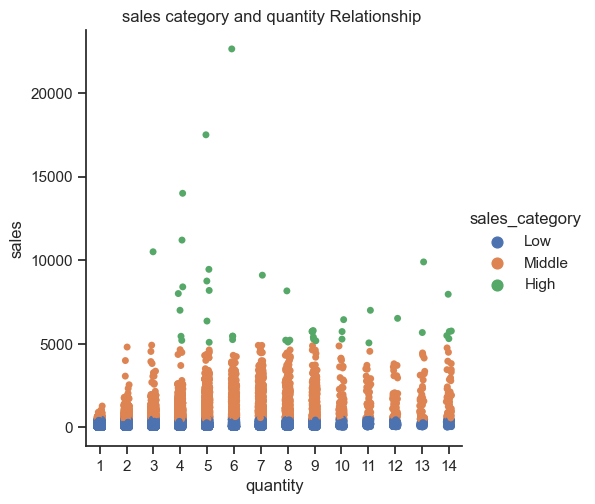

In [98]:
# Create a categorical plot in seaborn using the sales categories created above

sns.set(style="ticks")
g = sns.catplot(x="quantity", y="sales", hue="sales_category", data=sub3).set(title="sales category and quantity Relationship ")

#### Although the relationship between sales and quantity is a positive correlation, it is not strong.But the highest sales are related to quantities 4 and 5.

In [99]:
g.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'categorical plot_sales_category and quantity.png'))

## Revisit Questions 

### I can't use the above methods and graphs to answer my questions but, I want to add these questions to my questions list:
#### How do you interpret the relationship between the sales and profit variables?
#### How do you interpret the relationship between the sales and discount variables?


In [74]:
sub4 = df[['sales','profit']]

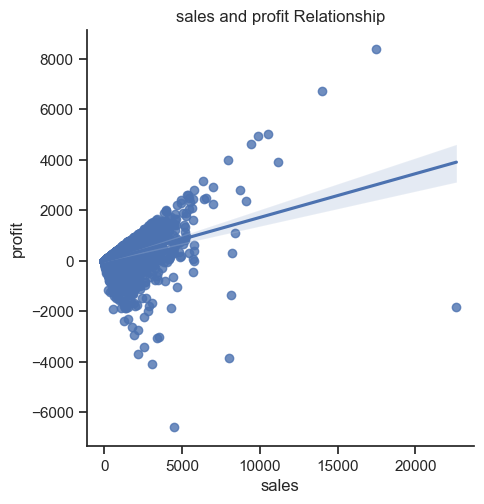

In [102]:
f4 = sns.lmplot(x = 'sales', y = 'profit', data = sub4).set(
    title="sales and profit Relationship")

#### There is a positive and almost moderate correlation between Sales and Profit(0.48), which means Increased sales will lead to a little increased Profit.

In [104]:
f4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplots_sales and profit.png'))

In [76]:
sub5 = df[['sales','discount']]

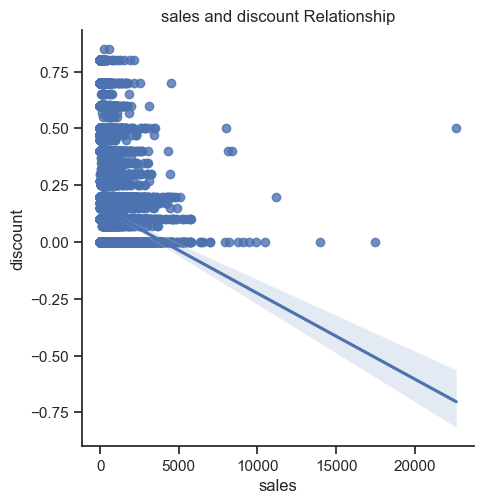

In [103]:
f5 = sns.lmplot(x = 'sales', y = 'discount', data = sub5).set(
    title="sales and discount Relationship")

#### There is a negative and weak correlation between Sales and Discount(-0.08), which means Increased sales will lead to a littel decreased Discount.

In [105]:
f5.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplots_sales and discount.png'))

In [100]:
df.to_csv(os.path.join(path, '02 Data','Prepared Data', 'GlobalSuperstore_clean.csv'))

## Hypothesis

### The highest profit margin belongs to sales between 5000 and 20000